# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "DAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'DAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                     PI                        \
var                                       SS DF      F p-unc   np2   
protein groups               Source                                  
A0A024QZX5;A0A087X1N8;P35237 AD        0.608  1  0.959 0.329 0.005   
                             age       0.036  1  0.056 0.813 0.000   
                             Kiel      2.112  1  3.331 0.070 0.017   
                             Magdeburg 5.490  1  8.659 0.004 0.043   
                             Sweden    8.900  1 14.038 0.000 0.068   
...                                      ... ..    ...   ...   ...   
S4R3U6                       AD        0.217  1  0.238 0.626 0.001   
                             age       3.329  1  3.659 0.057 0.019   
                             Kiel      0.269  1  0.296 0.587 0.002   
                             Magdeburg 3.543  1  3.894 0.050 0.020   
                             Sweden    7.313  1  8.039 0.005 0.040   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.483  0.496    False  
                             age               0.090  0.888    False  
                             Kiel              1.158  0.158    False  
                             Magdeburg         2.437  0.015     True  
                             Sweden            3.625  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.203  0.752    False  
                             age               1.242  0.135    False  
                             Kiel              0.231  0.722    False  
                             Magdeburg         1.302  0.122    False  
                             Sweden            2.295  0.019     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     DAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.125  1  8.034 0.005 0.040   
                             age        0.002  1  0.012 0.914 0.000   
                             Kiel       0.259  1  1.849 0.176 0.010   
                             Magdeburg  0.496  1  3.542 0.061 0.018   
                             Sweden     1.744  1 12.455 0.001 0.061   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         3.110  1  5.415 0.021 0.028   
                             age        0.470  1  0.818 0.367 0.004   
                             Kiel       2.819  1  4.908 0.028 0.025   
                             Magdeburg  3.001  1  5.226 0.023 0.027   
                             Sweden    25.132  1 43.762 0.000 0.186   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.294  0.015     True  
                             age               0.039  0.946    False  
                             Kiel              0.756  0.284    False  
                             Magdeburg         1.212  0.122    False  
                             Sweden            3.282  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.678  0.050    False  
                             age               0.435  0.499    False  
                             Kiel              1.554  0.063    False  
                             Magdeburg         1.632  0.055    False  
                             Sweden            9.440  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                    DAE                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.005         2.294  0.015     True   
                             age       0.914         0.039  0.946    False   
                             Kiel      0.176         0.756  0.284    False   
                             Magdeburg 0.061         1.212  0.122    False   
                             Sweden    0.001         3.282  0.002     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.021         1.678  0.050    False   
                             age       0.367         0.435  0.499    False   
                             Kiel      0.028         1.554  0.063    False   
                             Magdeburg 0.023         1.632  0.055    False   
                             Sweden    0.000         9.440  0.000     True   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.329         0.483  0.496    False  
                             age       0.813         0.090  0.888    False  
                             Kiel      0.070         1.158  0.158    False  
                             Magdeburg 0.004         2.437  0.015     True  
                             Sweden    0.000         3.625  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.626         0.203  0.752    False  
                             age       0.057         1.242  0.135    False  
                             Kiel      0.587         0.231  0.722    False  
                             Magdeburg 0.050         1.302  0.122    False  
                             Sweden    0.005         2.295  0.019     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'DAE': 'DAE', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.225         3.314     0.279     0.261         2.480     0.338
std       0.295         6.357     0.322     0.303         5.326     0.331
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.000         0.404     0.002     0.004         0.335     0.015
50%       0.059         1.231     0.117     0.120         0.919     0.241
75%       0.394         3.304     0.525     0.463         2.419     0.617
max       1.000        86.784     1.000     1.000       143.752     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                       DAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.005         2.294   
A0A024R0T9;K7ER74;P02655                           AD     0.029         1.530   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.282         0.550   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.265         0.577   
A0A075B6H7                                         AD     0.006         2.238   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.232         0.635   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.714         0.146   
S4R3U6                                             AD     0.021         1.678   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.015     True   
A0A024R0T9;K7ER74;P02655                           AD      0.066    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.411    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.392    False   
A0A075B6H7                                         AD      0.017     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.284    False   
Q9Y6X5                                             AD      0.353    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.156    False   
Q9Y6Y9                                             AD      0.804    False   
S4R3U6                                             AD      0.050    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.329         0.483   
A0A024R0T9;K7ER74;P02655                           AD     0.050         1.302   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.081         1.094   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.510         0.292   
A0A075B6H7                                         AD     0.105         0.978   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.089         1.050   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.155         0.809   
S4R3U6                                             AD     0.626         0.203   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.496    False  
A0A024R0T9;K7ER74;P02655                           AD      0.122    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.176    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.660    False  
A0A075B6H7                                         AD      0.217    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.239         1.606     0.299     0.259         1.392     0.341
std       0.292         1.875     0.317     0.294         1.665     0.319
min       0.000         0.001     0.000     0.000         0.001     0.000
25%       0.006         0.365     0.018     0.012         0.352     0.039
50%       0.085         1.072     0.158     0.131         0.882     0.256
75%       0.431         2.200     0.561     0.445         1.925     0.604
max       0.998        23.671     0.999     0.999        26.538     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,DAE,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,930,1037


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

DAE                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.005         2.294  0.015   
A0A024R0T9;K7ER74;P02655                           0.029         1.530  0.066   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.282         0.550  0.411   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.265         0.577  0.392   
A0A075B6H7                                         0.006         2.238  0.017   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.284   
Q9Y6X5                                             0.232         0.635  0.353   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.156   
Q9Y6Y9                                             0.714         0.146  0.804   
S4R3U6                                             0.021         1.678  0.050   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.329   
A0A024R0T9;K7ER74;P02655                              False 0.050   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.081   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.510   
A0A075B6H7                                             True 0.105   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.089   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.155   
S4R3U6                                                False 0.626   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.483  0.496   
A0A024R0T9;K7ER74;P02655                                   1.302  0.122   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.094  0.176   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.292  0.660   
A0A075B6H7                                                 0.978  0.217   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.316   
Q9Y6X5                                                     1.050  0.190   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.181   
Q9Y6Y9                                                     0.809  0.289   
S4R3U6                                                     0.203  0.752   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                              

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
DAE (no)  - PI (no)    881
DAE (yes) - PI (yes)   335
DAE (yes) - PI (no)    156
DAE (no)  - PI (yes)    49
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


DAE                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.005         2.294  0.015     True 0.329   
A0A075B6H7                   0.006         2.238  0.017     True 0.105   
A0A075B6I0                   0.001         3.134  0.003     True 0.023   
A0A075B6J9                   0.017         1.782  0.041     True 0.050   
A0A075B6Q5                   0.015         1.834  0.037     True 0.506   
...                            ...           ...    ...      ...   ...   
Q9UNW1                       0.996         0.002  0.997    False 0.007   
Q9UP79                       0.000         4.104  0.000     True 0.231   
Q9UQ52                       0.000         3.327  0.002     True 0.074   
Q9Y281;Q9Y281-3              0.006         2.239  0.017     True 0.439   
Q9Y6C2                       0.001         3.149  0.003     True 0.464   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.483  0.496    False       186  
A0A075B6H7                           0.978  0.217    False        91  
A0A075B6I0                           1.638  0.066    False       194  
A0A075B6J9                           1.301  0.122    False       156  
A0A075B6Q5                           0.296  0.656    False       104  
...                                    ...    ...      ...       ...  
Q9UNW1                               2.129  0.026     True       171  
Q9UP79                               0.636  0.386    False       135  
Q9UQ52                               1.131  0.165    False       188  
Q9Y281;Q9Y281-3                      0.357  0.598    False        51  
Q9Y6C2                               0.334  0.618    False       119  

[205 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,DAE,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.015,0.496,186,DAE (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.066,0.122,195,DAE (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.411,0.176,174,DAE (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.392,0.660,196,DAE (no) - PI (no)
A0A075B6H7,0.017,0.217,91,DAE (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.284,0.316,197,DAE (no) - PI (no)
Q9Y6X5,0.353,0.190,173,DAE (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.156,0.181,197,DAE (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,DAE,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
Q9UNW1,0.997,0.026,171,DAE (no) - PI (yes),0.971
O60565,0.000,0.971,81,DAE (yes) - PI (no),0.971
E5RJY1;E7ESM1;Q92597;Q92597-2;Q92597-3,0.004,0.974,60,DAE (yes) - PI (no),0.971
Q6UWP8,0.003,0.968,59,DAE (yes) - PI (no),0.965
P22692;P22692-2,0.038,0.986,170,DAE (yes) - PI (no),0.948
...,...,...,...,...,...
A0A0J9YXX1,0.047,0.058,197,DAE (yes) - PI (no),0.011
F5GY80;F5H7G1;P07358,0.046,0.058,197,DAE (yes) - PI (no),0.011
Q9NX62,0.045,0.056,197,DAE (yes) - PI (no),0.011


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_1_DAE


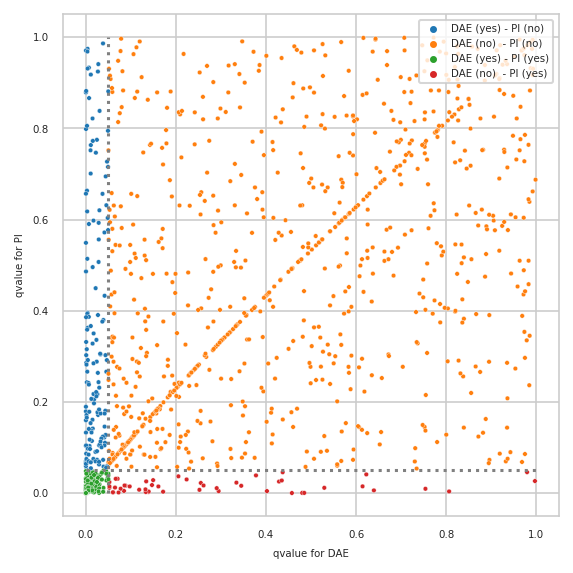

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_2_DAE


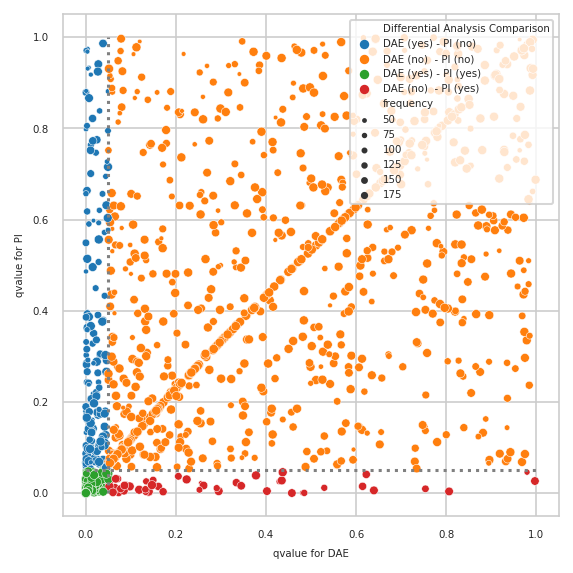

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.506


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/vaep/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out